In [98]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter 
from sklearn.model_selection import KFold

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import roc_curve

In [100]:
### import the dataset
data = pd.read_excel (r'/Users/sammy/Desktop/A1/hmeq.xlsx')
print (data.shape)
print (data.columns.values)

(5960, 14)
['CustomerID' 'BAD' 'LOAN' 'MORTDUE' 'VALUE' 'REASON' 'JOB' 'YOJ' 'DEROG'
 'DELINQ' 'CLAGE' 'NINQ' 'CLNO' 'DEBTINC']


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  5960 non-null   int64  
 1   BAD         5960 non-null   int64  
 2   LOAN        5960 non-null   int64  
 3   MORTDUE     5442 non-null   float64
 4   VALUE       5848 non-null   float64
 5   REASON      5708 non-null   object 
 6   JOB         5681 non-null   object 
 7   YOJ         5445 non-null   float64
 8   DEROG       5252 non-null   float64
 9   DELINQ      5380 non-null   float64
 10  CLAGE       5652 non-null   float64
 11  NINQ        5450 non-null   float64
 12  CLNO        5738 non-null   float64
 13  DEBTINC     4693 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 652.0+ KB


In [102]:
print(data.isnull().sum())

CustomerID       0
BAD              0
LOAN             0
MORTDUE        518
VALUE          112
REASON         252
JOB            279
YOJ            515
DEROG          708
DELINQ         580
CLAGE          308
NINQ           510
CLNO           222
DEBTINC       1267
dtype: int64


In [103]:
# Summary of Missing data percentage 
percent_of_missing_value = data.isnull().sum()/len(data)
percent_of_missing_value

CustomerID    0.000000
BAD           0.000000
LOAN          0.000000
MORTDUE       0.086913
VALUE         0.018792
REASON        0.042282
JOB           0.046812
YOJ           0.086409
DEROG         0.118792
DELINQ        0.097315
CLAGE         0.051678
NINQ          0.085570
CLNO          0.037248
DEBTINC       0.212584
dtype: float64

Loan: Amount of the loan request 

MORTDUE: Amount due on existing mortgage 

VALUE: Value of current property

REASON: DebtCon = debt consolidation; HomeImp = home improvement

JOB: Occupational categories (job categories)

YOJ: Years at present job

DEROG: Number of major derogatory reports

DELINQ: Number of delinquent credit lines 

CLAGE: Age of oldest credit line in months 

NINQ: Number of recent credit inquiries

CLNO: Number of credit lines

DEBTINC: Debt-to-income ratio 

In [104]:
data.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,5960.0,NaN,NaN,NaN,2980.5,1720.648134,1.0,1490.75,2980.5,4470.25,5960.0
BAD,5960.0,NaN,NaN,NaN,0.199497,0.399656,0.0,0.0,0.0,0.0,1.0
LOAN,5960.0,NaN,NaN,NaN,18607.969799,11207.480417,1100.0,11100.0,16300.0,23300.0,89900.0
MORTDUE,5442.0,NaN,NaN,NaN,73760.8172,44457.609458,2063.0,46276.0,65019.0,91488.0,399550.0
VALUE,5848.0,NaN,NaN,NaN,101776.048741,57385.775334,8000.0,66075.5,89235.5,119824.25,855909.0
REASON,5708,2,DebtCon,3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,5681,6,Other,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,5445.0,NaN,NaN,NaN,8.922268,7.573982,0.0,3.0,7.0,13.0,41.0
DEROG,5252.0,NaN,NaN,NaN,0.25457,0.846047,0.0,0.0,0.0,0.0,10.0
DELINQ,5380.0,NaN,NaN,NaN,0.449442,1.127266,0.0,0.0,0.0,0.0,15.0


## Data Cleaning 

In [105]:
# drop N/A in Debt to income variable 
data1 = data.drop(data[data.DEBTINC.isna()].index)
data1.shape

(4693, 14)

In [106]:
# Impute 0 to N/A to the variables "NINQ" and "DEROG"

data1[['NINQ','DEROG']] = data1[['NINQ','DEROG']].fillna(0)
data1

,CustomerID,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,6,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,8,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
17,18,1,2200,23030.0,NaN,NaN,NaN,19.0,0.0,NaN,NaN,0.0,NaN,3.711312
19,20,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,26,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,5956,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,5957,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,5958,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,5959,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [107]:
# Impute mean value to the variables: CLNO, DELINQ
data1[['DELINQ','CLNO','CLAGE']]= data1[['DELINQ','CLNO','CLAGE']].fillna(data1[['DELINQ','CLNO','CLAGE']].mean())
data1

,CustomerID,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,6,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.00000,101.466002,1.0,8.000000,37.113614
7,8,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.00000,88.766030,0.0,8.000000,36.884894
17,18,1,2200,23030.0,NaN,NaN,NaN,19.0,0.0,0.30543,183.751040,0.0,21.261426,3.711312
19,20,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.00000,90.992533,0.0,13.000000,31.588503
25,26,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.00000,70.491080,1.0,21.000000,38.263601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,5956,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.00000,221.808718,0.0,16.000000,36.112347
5956,5957,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.00000,208.692070,0.0,15.000000,35.859971
5957,5958,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.00000,212.279697,0.0,15.000000,35.556590
5958,5959,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.00000,213.892709,0.0,16.000000,34.340882


In [108]:
categorical = [var for var in data1.columns if data1[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 2 categorical variables

The categorical variables are :

 ['REASON', 'JOB']


In [109]:
# Impute categorical variables with mode 
data1['REASON'].fillna(data1['REASON'].mode()[0],inplace = True)

data1

,CustomerID,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,6,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.00000,101.466002,1.0,8.000000,37.113614
7,8,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.00000,88.766030,0.0,8.000000,36.884894
17,18,1,2200,23030.0,NaN,DebtCon,NaN,19.0,0.0,0.30543,183.751040,0.0,21.261426,3.711312
19,20,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.00000,90.992533,0.0,13.000000,31.588503
25,26,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.00000,70.491080,1.0,21.000000,38.263601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,5956,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.00000,221.808718,0.0,16.000000,36.112347
5956,5957,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.00000,208.692070,0.0,15.000000,35.859971
5957,5958,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.00000,212.279697,0.0,15.000000,35.556590
5958,5959,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.00000,213.892709,0.0,16.000000,34.340882


In [110]:
# Impute job with mode (Categorical variable)
data1['JOB'].fillna(data1['JOB'].mode()[0],inplace = True)

data1

,CustomerID,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,6,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.00000,101.466002,1.0,8.000000,37.113614
7,8,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.00000,88.766030,0.0,8.000000,36.884894
17,18,1,2200,23030.0,NaN,DebtCon,Other,19.0,0.0,0.30543,183.751040,0.0,21.261426,3.711312
19,20,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.00000,90.992533,0.0,13.000000,31.588503
25,26,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.00000,70.491080,1.0,21.000000,38.263601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,5956,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.00000,221.808718,0.0,16.000000,36.112347
5956,5957,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.00000,208.692070,0.0,15.000000,35.859971
5957,5958,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.00000,212.279697,0.0,15.000000,35.556590
5958,5959,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.00000,213.892709,0.0,16.000000,34.340882


In [111]:
data1['REASON'].value_counts()


REASON
DebtCon    3324
HomeImp    1369
Name: count, dtype: int64

In [112]:
data1['JOB'].value_counts()

JOB
Other      2073
ProfExe    1024
Office      789
Mgr         586
Self        142
Sales        79
Name: count, dtype: int64

In [113]:
# Convert categorical variables into dummy variables
data2 = pd.get_dummies(data1,columns=['REASON','JOB'],dtype= float)


## Create a new data set -- Correlation Matrix

In [114]:
data3 = data2.loc[:, data2.columns != 'CustomerID']
data3

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
5,1,1700,30548.0,40320.0,9.0,0.0,0.00000,101.466002,1.0,8.000000,37.113614,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1,1800,28502.0,43034.0,11.0,0.0,0.00000,88.766030,0.0,8.000000,36.884894,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
17,1,2200,23030.0,NaN,19.0,0.0,0.30543,183.751040,0.0,21.261426,3.711312,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19,0,2300,102370.0,120953.0,2.0,0.0,0.00000,90.992533,0.0,13.000000,31.588503,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25,1,2400,34863.0,47471.0,12.0,0.0,0.00000,70.491080,1.0,21.000000,38.263601,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.00000,221.808718,0.0,16.000000,36.112347,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5956,0,89000,54576.0,92937.0,16.0,0.0,0.00000,208.692070,0.0,15.000000,35.859971,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5957,0,89200,54045.0,92924.0,15.0,0.0,0.00000,212.279697,0.0,15.000000,35.556590,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5958,0,89800,50370.0,91861.0,14.0,0.0,0.00000,213.892709,0.0,16.000000,34.340882,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [115]:
dfCorr = pd.DataFrame(data3).corr() 
filteredDf = dfCorr[((dfCorr >= .01) | (dfCorr <= -.01)) & (dfCorr != 1.000)]

<function matplotlib.pyplot.show(close=None, block=None)>

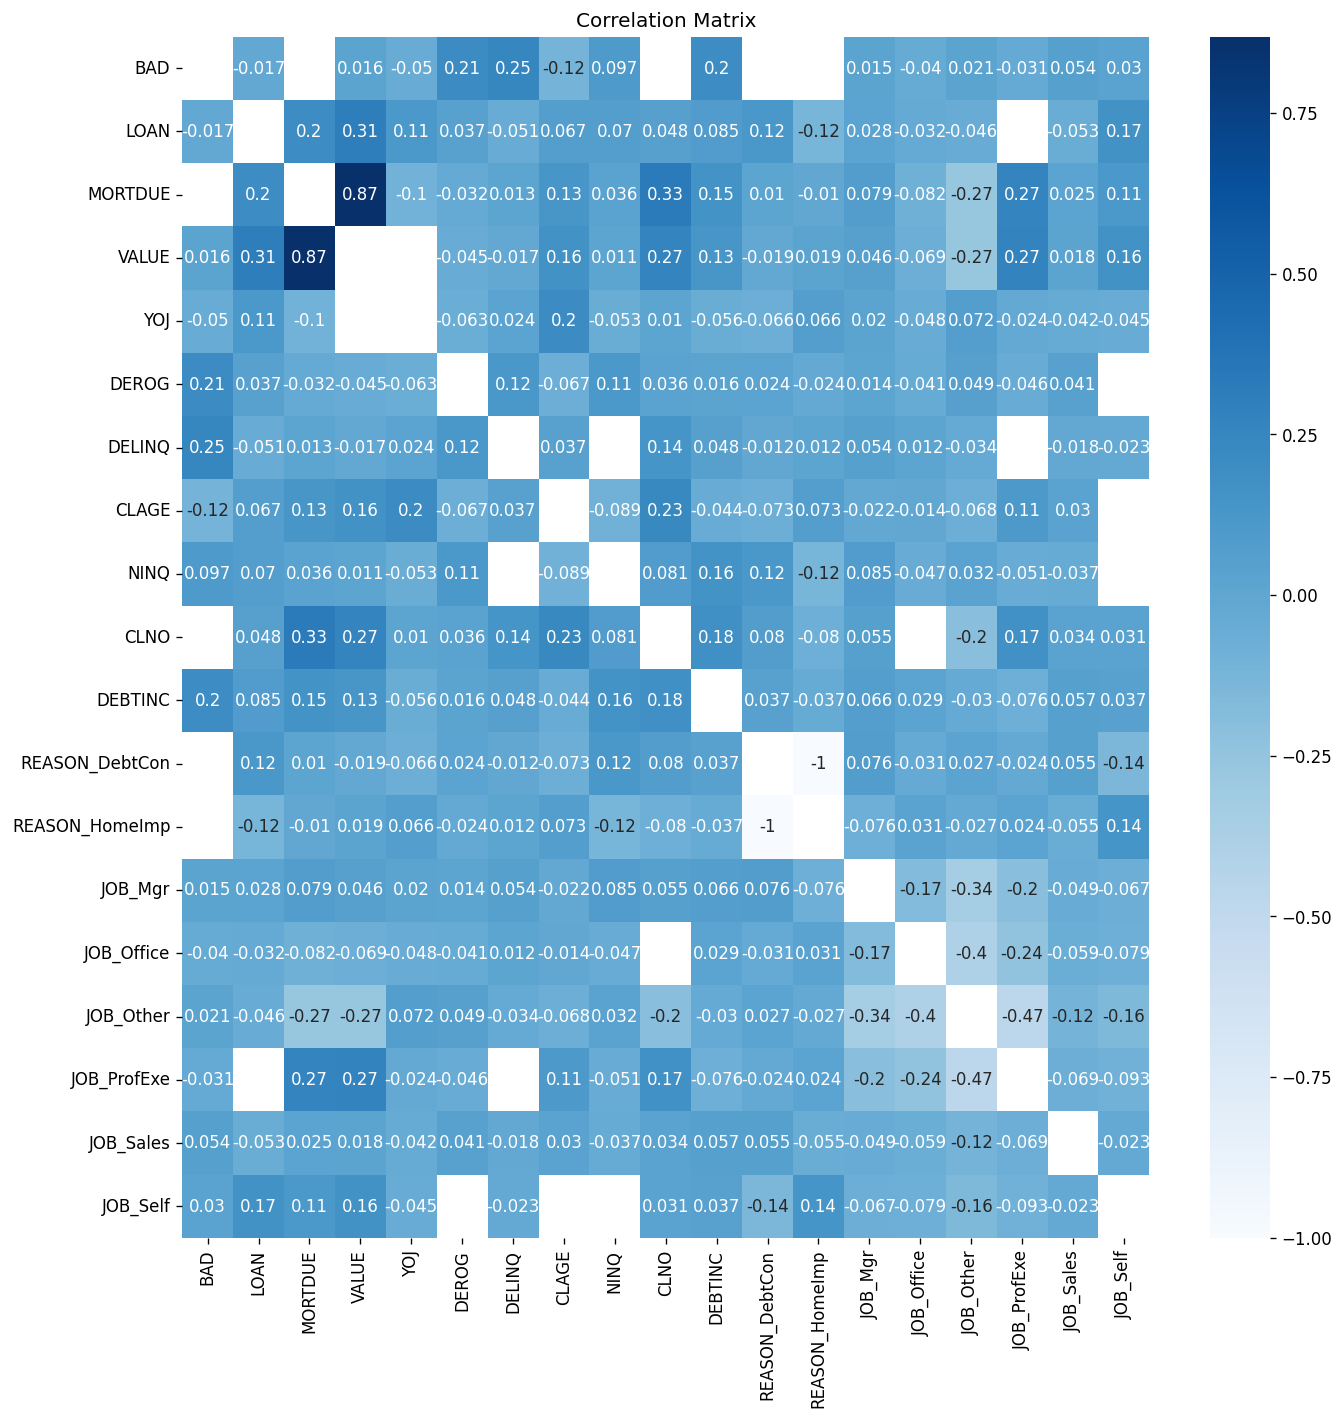

In [116]:
plt.figure(figsize= (13,13))
sns.heatmap(filteredDf, annot = True, cmap = 'Blues')
plt.title('Correlation Matrix')
plt.show

In [117]:
data4 = data1[['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ',
 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC' ]]

In [118]:
### heatmap of correlations - only show if greater than 1% (or threshold can be changed)
dfCorr = pd.DataFrame(data4).corr() 
filteredDf = dfCorr[((dfCorr >= .01) | (dfCorr <= -.01)) & (dfCorr != 1.000)]

<function matplotlib.pyplot.show(close=None, block=None)>

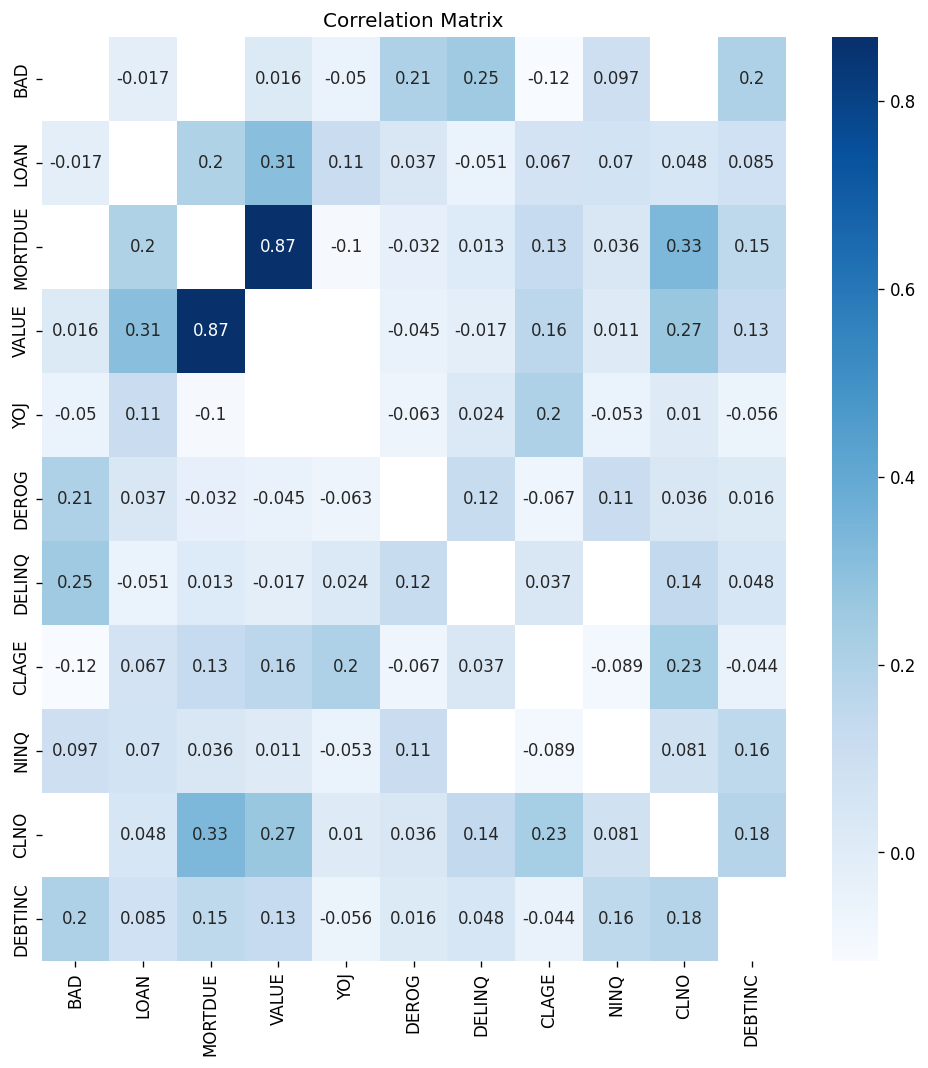

In [119]:
plt.figure(figsize= (10,10))
sns.heatmap(filteredDf, annot = True, cmap = 'Blues')
plt.title('Correlation Matrix')
plt.show


## Descriptive stats and histograms for 5 variables 

In [120]:
print (data2['DEBTINC'].describe().round(decimals=2))

count    4693.00
mean       33.78
std         8.60
min         0.52
25%        29.14
50%        34.82
75%        39.00
max       203.31
Name: DEBTINC, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

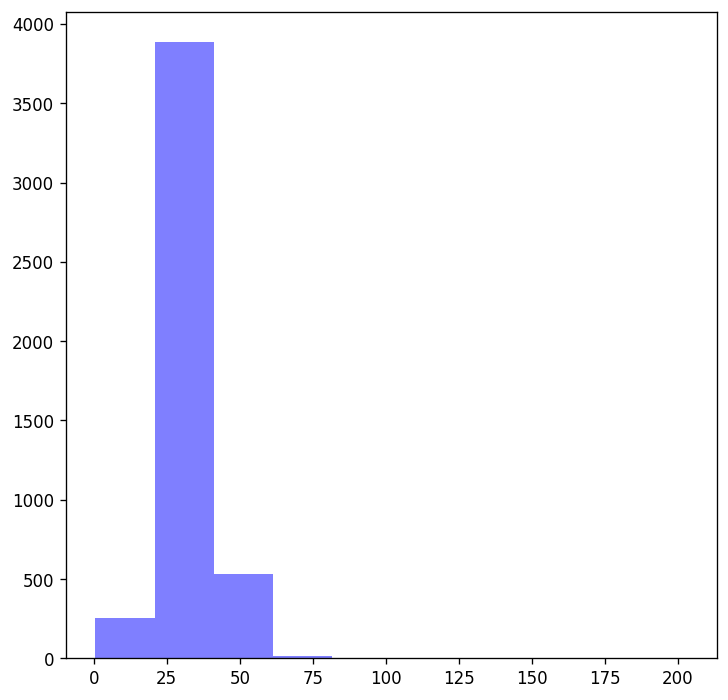

In [121]:
# Descriptive stats and histogram for Debt-to-income variable 
import matplotlib.mlab as mlab
x = data2['DEBTINC']
num_bins = 10
n,bins, patches = plt.hist(x, num_bins, facecolor = 'blue', alpha =0.5)
plt.show

<Axes: xlabel='CLAGE', ylabel='Count'>

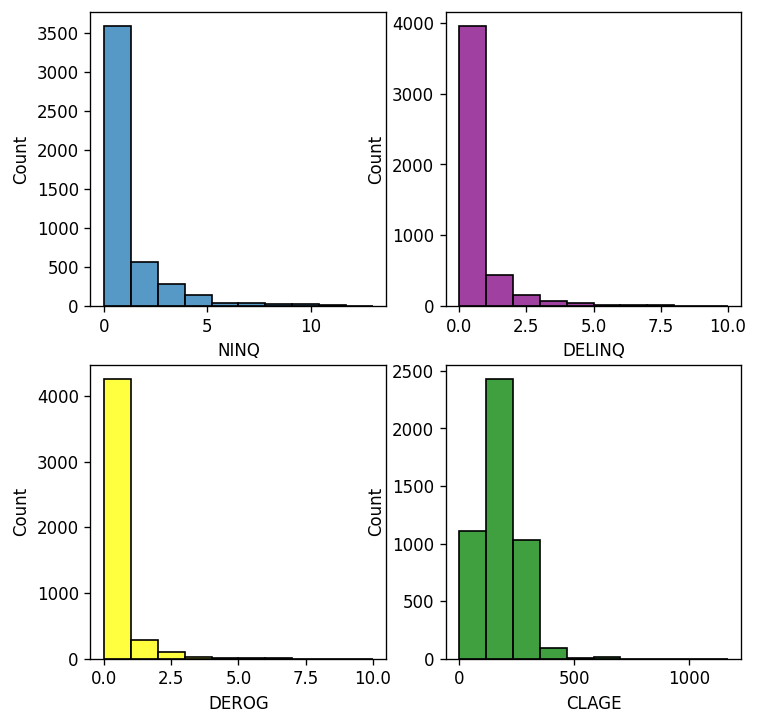

In [122]:
import seaborn as sns

plt.rcParams.update({'figure.figsize':(7,7), 'figure.dpi':120})

fig,ax = plt.subplots(2,2)
sns.histplot(data = data2['NINQ'], bins = 10,ax = ax[0,0])
sns.histplot(data = data2['DELINQ'], bins = 10,ax = ax[0,1],color= 'purple')
sns.histplot(data = data2['DEROG'], bins = 10,ax = ax[1,0],color='yellow')
sns.histplot(data = data2['CLAGE'], bins = 10,ax = ax[1,1],color= 'green')


In [123]:
# Apply Log Transformation to the data
Log_data = np.log1p(data2)
Log_data

,CustomerID,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
5,1.945910,0.693147,7.438972,10.327087,10.604628,2.302585,0.0,0.000000,4.629531,0.693147,2.197225,3.640572,0.000000,0.693147,0.000000,0.000000,0.693147,0.0,0.0,0.0
7,2.197225,0.693147,7.496097,10.257765,10.669769,2.484907,0.0,0.000000,4.497207,0.000000,2.197225,3.634552,0.000000,0.693147,0.000000,0.000000,0.693147,0.0,0.0,0.0
17,2.944439,0.693147,7.696667,10.044596,NaN,2.995732,0.0,0.266533,5.219009,0.000000,3.102855,1.549966,0.693147,0.000000,0.000000,0.000000,0.693147,0.0,0.0,0.0
19,3.044522,0.000000,7.741099,11.536359,11.703166,1.098612,0.0,0.000000,4.521707,0.000000,2.639057,3.483960,0.000000,0.693147,0.000000,0.693147,0.000000,0.0,0.0,0.0
25,3.295837,0.693147,7.783641,10.459210,10.767895,2.564949,0.0,0.000000,4.269573,0.693147,3.091042,3.670298,0.000000,0.693147,0.693147,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,8.692322,0.000000,11.395279,10.955445,11.409629,2.833213,0.0,0.000000,5.406314,0.000000,2.833213,3.613950,0.693147,0.000000,0.000000,0.000000,0.693147,0.0,0.0,0.0
5956,8.692490,0.000000,11.396403,10.907368,11.439688,2.833213,0.0,0.000000,5.345640,0.000000,2.772589,3.607126,0.693147,0.000000,0.000000,0.000000,0.693147,0.0,0.0,0.0
5957,8.692658,0.000000,11.398648,10.897591,11.439548,2.772589,0.0,0.000000,5.362604,0.000000,2.772589,3.598861,0.693147,0.000000,0.000000,0.000000,0.693147,0.0,0.0,0.0
5958,8.692826,0.000000,11.405351,10.827171,11.428043,2.708050,0.0,0.000000,5.370139,0.000000,2.833213,3.565040,0.693147,0.000000,0.000000,0.000000,0.693147,0.0,0.0,0.0


(array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
        [4290.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [3669.,    0.,    0., ...,    0.,    0.,    0.],
        [4614.,    0.,    0., ...,    0.,    0.,    0.],
        [4551.,    0.,    0., ...,    0.,    0.,    0.]]),
 array([ 0.        ,  0.13659921,  0.27319841,  0.40979762,  0.54639682,
         0.68299603,  0.81959523,  0.95619444,  1.09279364,  1.22939285,
         1.36599205,  1.50259126,  1.63919046,  1.77578967,  1.91238887,
         2.04898808,  2.18558728,  2.32218649,  2.45878569,  2.5953849 ,
         2.7319841 ,  2.86858331,  3.00518251,  3.14178172,  3.27838092,
         3.41498013,  3.55157933,  3.68817854,  3.82477774,  3.96137695,
         4.09797615,  4.23457536,  4.37117456,  4.50777377,  4.64437297,
         4.78097218,  4.91757138,  5.05417059,  5.19076979,  5.327369  ,
         5.4639682 ,  5.60056741,  5.73716661,  5.87376582,

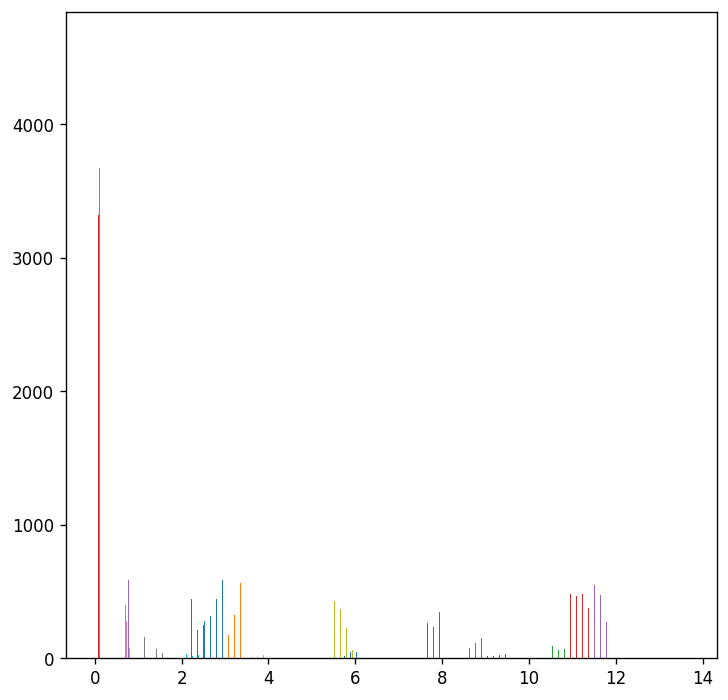

In [124]:
plt.hist(Log_data,bins = 100, label = 'Log Transformation Data')

#### Linear Regression -> OLS -> LOGISTIC ###

In [125]:
data_ols = smf.ols(formula = 'BAD ~ DEBTINC + DEROG + DELINQ + NINQ + CLAGE' , data=data2).fit()
print(data_ols.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    BAD   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     154.4
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          3.26e-152
Time:                        16:23:57   Log-Likelihood:                -330.30
No. Observations:                4693   AIC:                             672.6
Df Residuals:                    4687   BIC:                             711.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0876      0.018     -4.898      0.0


## UniVARIATE LOGISTIC MODEL & OOS predictions
### out of sample testing and ROC curve

In [126]:
x = pd.DataFrame(data1['DEBTINC'])
y = pd.DataFrame(data1['BAD'])
print(y.value_counts())


BAD
0      4290
1       403
Name: count, dtype: int64


In [127]:
# Apply Oversampling to solve the problem of imbalance data 
ros = RandomOverSampler()
x_ros1, y_ros_1 = ros.fit_resample(x,y)


In [128]:
x_train,x_test,y_train,y_test = train_test_split(x_ros1,y_ros_1,test_size=0.3,random_state = 0)

In [129]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6006, 1)
(2574, 1)
(6006, 1)
(2574, 1)


In [130]:
x_train = x_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1)
x_test = x_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1)
x_train


array([[40.04844004],
       [46.489874  ],
       [36.61115697],
       ...,
       [47.91511242],
       [34.78092033],
       [38.86401954]])

In [131]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred  = lr.predict(x_test)

In [132]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[732 550]
 [520 772]]


In [133]:
logit_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.figure()

<Figure size 840x840 with 0 Axes>

<Figure size 840x840 with 0 Axes>

In [134]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[732 550]
 [520 772]]


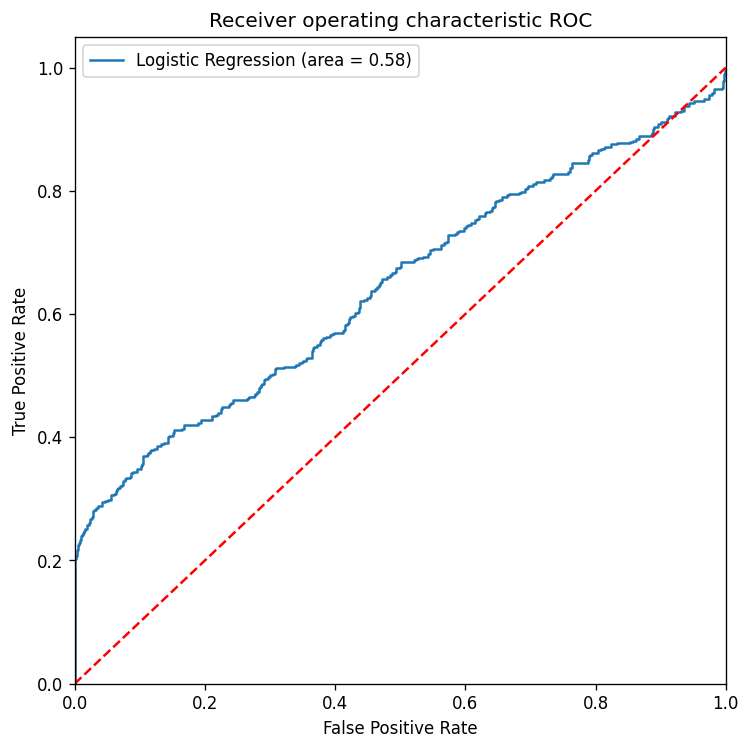

In [135]:
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="upper left")


## Logistic model with 5 variables

In [136]:

#define the predictor variables and the response variable
x = data1[['DEBTINC', 'DEROG', 'DELINQ','NINQ','CLAGE']]
y = data1['BAD']


In [137]:
# Apply Oversampling to solve the problem of imbalance data 
counter = Counter(y)
ros = SMOTE()
x,y = ros.fit_resample(x,y)
counter1 = Counter(y)

In [138]:
#Split the dataset into 70% training data and 30% test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 0)

In [139]:
print('Before :',counter)
print('After :', counter1)

Before : Counter({0: 4290, 1: 403})
After : Counter({1: 4290, 0: 4290})


In [140]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6006, 5)
(2574, 5)
(6006,)
(2574,)


In [141]:
log_regression = LogisticRegression()

# Fit the model using the train data
log_regression.fit(x_train, y_train)

LogisticRegression()

In [142]:
# Confusion matrix
y_pred = log_regression.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1003  279]
 [ 452  840]]


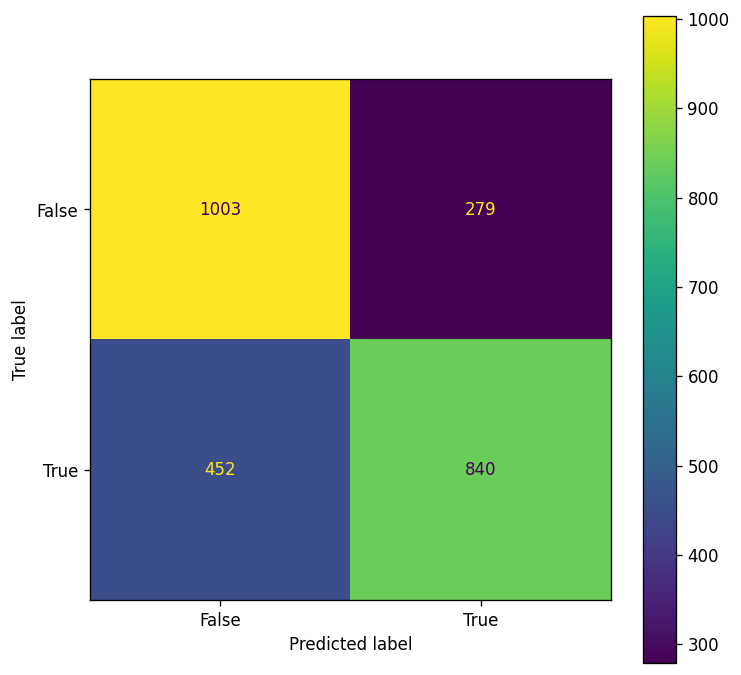

In [143]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False,True])
cm_display.plot()
plt.show()


In [144]:
Accuracy = metrics.accuracy_score(y_test,y_pred)
Precision = metrics.precision_score(y_test,y_pred)
Sensitivity_recall = metrics.recall_score(y_test,y_pred)
Specificity = metrics.recall_score(y_test,y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test,y_pred)



In [145]:
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.7160062160062161, 'Precision': 0.7506702412868632, 'Sensitivity_recall': 0.6501547987616099, 'Specificity': 0.782371294851794, 'F1_score': 0.6968063044379924}


In [146]:
from sklearn import metrics
# define metrics
y_pred_proba = log_regression.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.7847645175156852

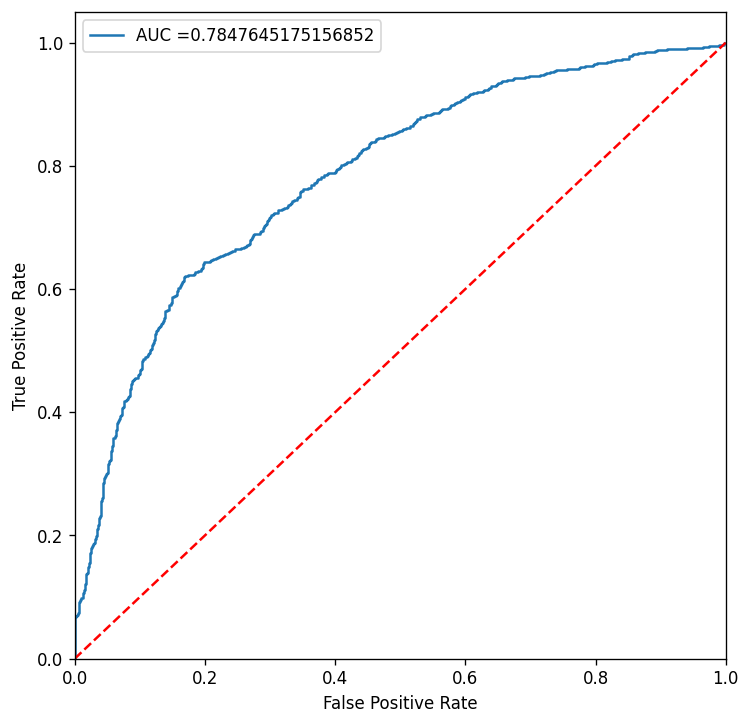

In [147]:
#create ROC curve
plt.plot(fpr,tpr, label = "AUC ="+ str(auc))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 2)

In [148]:
##MULTIVARIATE logit MODEL & predictions
model_lr2 = smf.glm('BAD ~ DEBTINC + DEROG + DELINQ + NINQ + CLNO', family = sm.families.Binomial(), data = data2).fit()
print(model_lr2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    BAD   No. Observations:                 4693
Model:                            GLM   Df Residuals:                     4687
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1144.2
Date:                Tue, 19 Sep 2023   Deviance:                       2288.5
Time:                        16:24:12   Pearson chi2:                 5.72e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.09347
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5301      0.317    -17.450      0.0

In [149]:
PD_logit_model = pd.DataFrame(model_lr2.fittedvalues, columns = ['PD_logit_model'])
data5 = pd.concat([data2, PD_logit_model], axis = 1)
print(data5)
data5.head(10)
 

      CustomerID  BAD   LOAN   MORTDUE     VALUE   YOJ  DEROG   DELINQ   
5              6    1   1700   30548.0   40320.0   9.0    0.0  0.00000  \
7              8    1   1800   28502.0   43034.0  11.0    0.0  0.00000   
17            18    1   2200   23030.0       NaN  19.0    0.0  0.30543   
19            20    0   2300  102370.0  120953.0   2.0    0.0  0.00000   
25            26    1   2400   34863.0   47471.0  12.0    0.0  0.00000   
...          ...  ...    ...       ...       ...   ...    ...      ...   
5955        5956    0  88900   57264.0   90185.0  16.0    0.0  0.00000   
5956        5957    0  89000   54576.0   92937.0  16.0    0.0  0.00000   
5957        5958    0  89200   54045.0   92924.0  15.0    0.0  0.00000   
5958        5959    0  89800   50370.0   91861.0  14.0    0.0  0.00000   
5959        5960    0  89900   48811.0   88934.0  15.0    0.0  0.00000   

           CLAGE  NINQ  ...    DEBTINC  REASON_DebtCon  REASON_HomeImp   
5     101.466002   1.0  ...  37.11361

,CustomerID,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,...,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,PD_logit_model
5,6,1,1700,30548.0,40320.0,9.0,0.0,0.00000,101.466002,1.0,...,37.113614,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.087940
7,8,1,1800,28502.0,43034.0,11.0,0.0,0.00000,88.766030,0.0,...,36.884894,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.077752
17,18,1,2200,23030.0,NaN,19.0,0.0,0.30543,183.751040,0.0,...,3.711312,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.003632
19,20,0,2300,102370.0,120953.0,2.0,0.0,0.00000,90.992533,0.0,...,31.588503,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.043504
25,26,1,2400,34863.0,47471.0,12.0,0.0,0.00000,70.491080,1.0,...,38.263601,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.068289
26,27,0,2400,98449.0,117195.0,4.0,0.0,0.00000,93.811775,0.0,...,29.681827,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.036954
34,35,0,2900,103949.0,112505.0,1.0,0.0,0.00000,96.102330,0.0,...,30.051136,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.038144
35,36,0,2900,104373.0,120702.0,2.0,0.0,0.00000,101.540298,0.0,...,29.915859,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.037704
36,37,1,2900,7750.0,67996.0,16.0,3.0,0.00000,122.204663,2.0,...,36.211348,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.361246
37,38,1,2900,61962.0,70915.0,2.0,0.0,0.00000,282.801659,3.0,...,49.206396,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.133123


# Decision Tree Model

In [150]:
x = data1[['DEBTINC', 'DEROG', 'DELINQ','NINQ','CLAGE']]
y = data1['BAD']


In [151]:
# Apply Oversampling to solve the problem of imbalance data 
counter = Counter(y)
ros = SMOTE()
x,y = ros.fit_resample(x,y)
counter1 = Counter(y)

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 0)

In [153]:
kf = KFold()
for train, test in kf.split(x):
    print("%s %s" % (train, test))

[1716 1717 1718 ... 8577 8578 8579] [   0    1    2 ... 1713 1714 1715]
[   0    1    2 ... 8577 8578 8579] [1716 1717 1718 ... 3429 3430 3431]
[   0    1    2 ... 8577 8578 8579] [3432 3433 3434 ... 5145 5146 5147]
[   0    1    2 ... 8577 8578 8579] [5148 5149 5150 ... 6861 6862 6863]
[   0    1    2 ... 6861 6862 6863] [6864 6865 6866 ... 8577 8578 8579]


In [154]:
# Feature scaling
cols = x_train.columns 

In [155]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [156]:
x_train = pd.DataFrame(x_train, columns=[cols])

In [157]:
x_test = pd.DataFrame(x_test, columns=[cols])

In [158]:
from sklearn.tree import DecisionTreeRegressor 
dt = DecisionTreeRegressor(
                           random_state=42)
hyperparameter_space = {'max_depth':[None,10,20,30,40,50,60,70], 
                        'min_samples_leaf':[1,2,4,6,8,10,12,14],
                        'max_features':['1.0','sqrt','log2']}


In [159]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(dt, param_grid=hyperparameter_space , 
                  scoring="neg_mean_squared_error",
                  n_jobs=2, cv=5, return_train_score=True)

In [160]:
gs.fit(x_train, y_train)
print("Optimal hyperparameter combination: ", gs.best_params_)
print("Mean cross-validated MSE or training score of the best_estimator: ",
       np.sqrt(-gs.best_score_))
gs.best_estimator_.fit(x_train, y_train)
y_pred = gs.best_estimator_.predict(x_test)

Optimal hyperparameter combination:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 8}
Mean cross-validated MSE or training score of the best_estimator:  0.2845426321833905


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
320 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
178 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/skl

In [180]:
# Apply data to decision trees model

clf = tree.DecisionTreeClassifier(max_depth= 20, 
                                  min_samples_leaf=8,
                                  max_features = 'sqrt',
                                  random_state= 0)
clf = clf.fit(x_train, y_train)

In [181]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [182]:
# fit the data into decision tree model 
train_prediction = clf.predict(x_train)
test_prediction = clf.predict(x_test)

In [183]:
y_pred_proba_tree = clf.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_tree)
auc = metrics.roc_auc_score(y_test, y_pred_proba_tree)
print('AUC score in Decision Tree Model is :',auc)

AUC score in Decision Tree Model is : 0.951694515149027


In [184]:
metrics.confusion_matrix(y_test,test_prediction,labels = [0,1])

array([[1186,   96],
       [ 173, 1119]])

In [185]:
Precision = metrics.precision_score(y_test,test_prediction)
Sensitivity_recall = metrics.recall_score(y_test,test_prediction)
Specificity = metrics.recall_score(y_test,test_prediction, pos_label=0)
F1_score = metrics.f1_score(y_test,test_prediction)


In [186]:
Accuracy_of_tree_train = accuracy_score(y_train,train_prediction)*100
Accuracy_of_tree_train

print('Train Set Accuracy Under Decision Tree:', Accuracy_of_tree_train)

Train Set Accuracy Under Decision Tree: 93.35664335664336


In [187]:
Accuracy_of_tree = accuracy_score(y_test,test_prediction)*100
Accuracy_of_tree
print('Test Set Accuracy Under Decision Tree:', Accuracy_of_tree)

Test Set Accuracy Under Decision Tree: 89.54933954933955


In [188]:
print({"Accuracy":Accuracy_of_tree,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 89.54933954933955, 'Precision': 0.9209876543209876, 'Sensitivity_recall': 0.8660990712074303, 'Specificity': 0.9251170046801872, 'F1_score': 0.8927004387714399}


In [189]:
feature_names = x.columns
clf.feature_importances_

array([0.21715882, 0.08930339, 0.28801889, 0.22501422, 0.18050467])

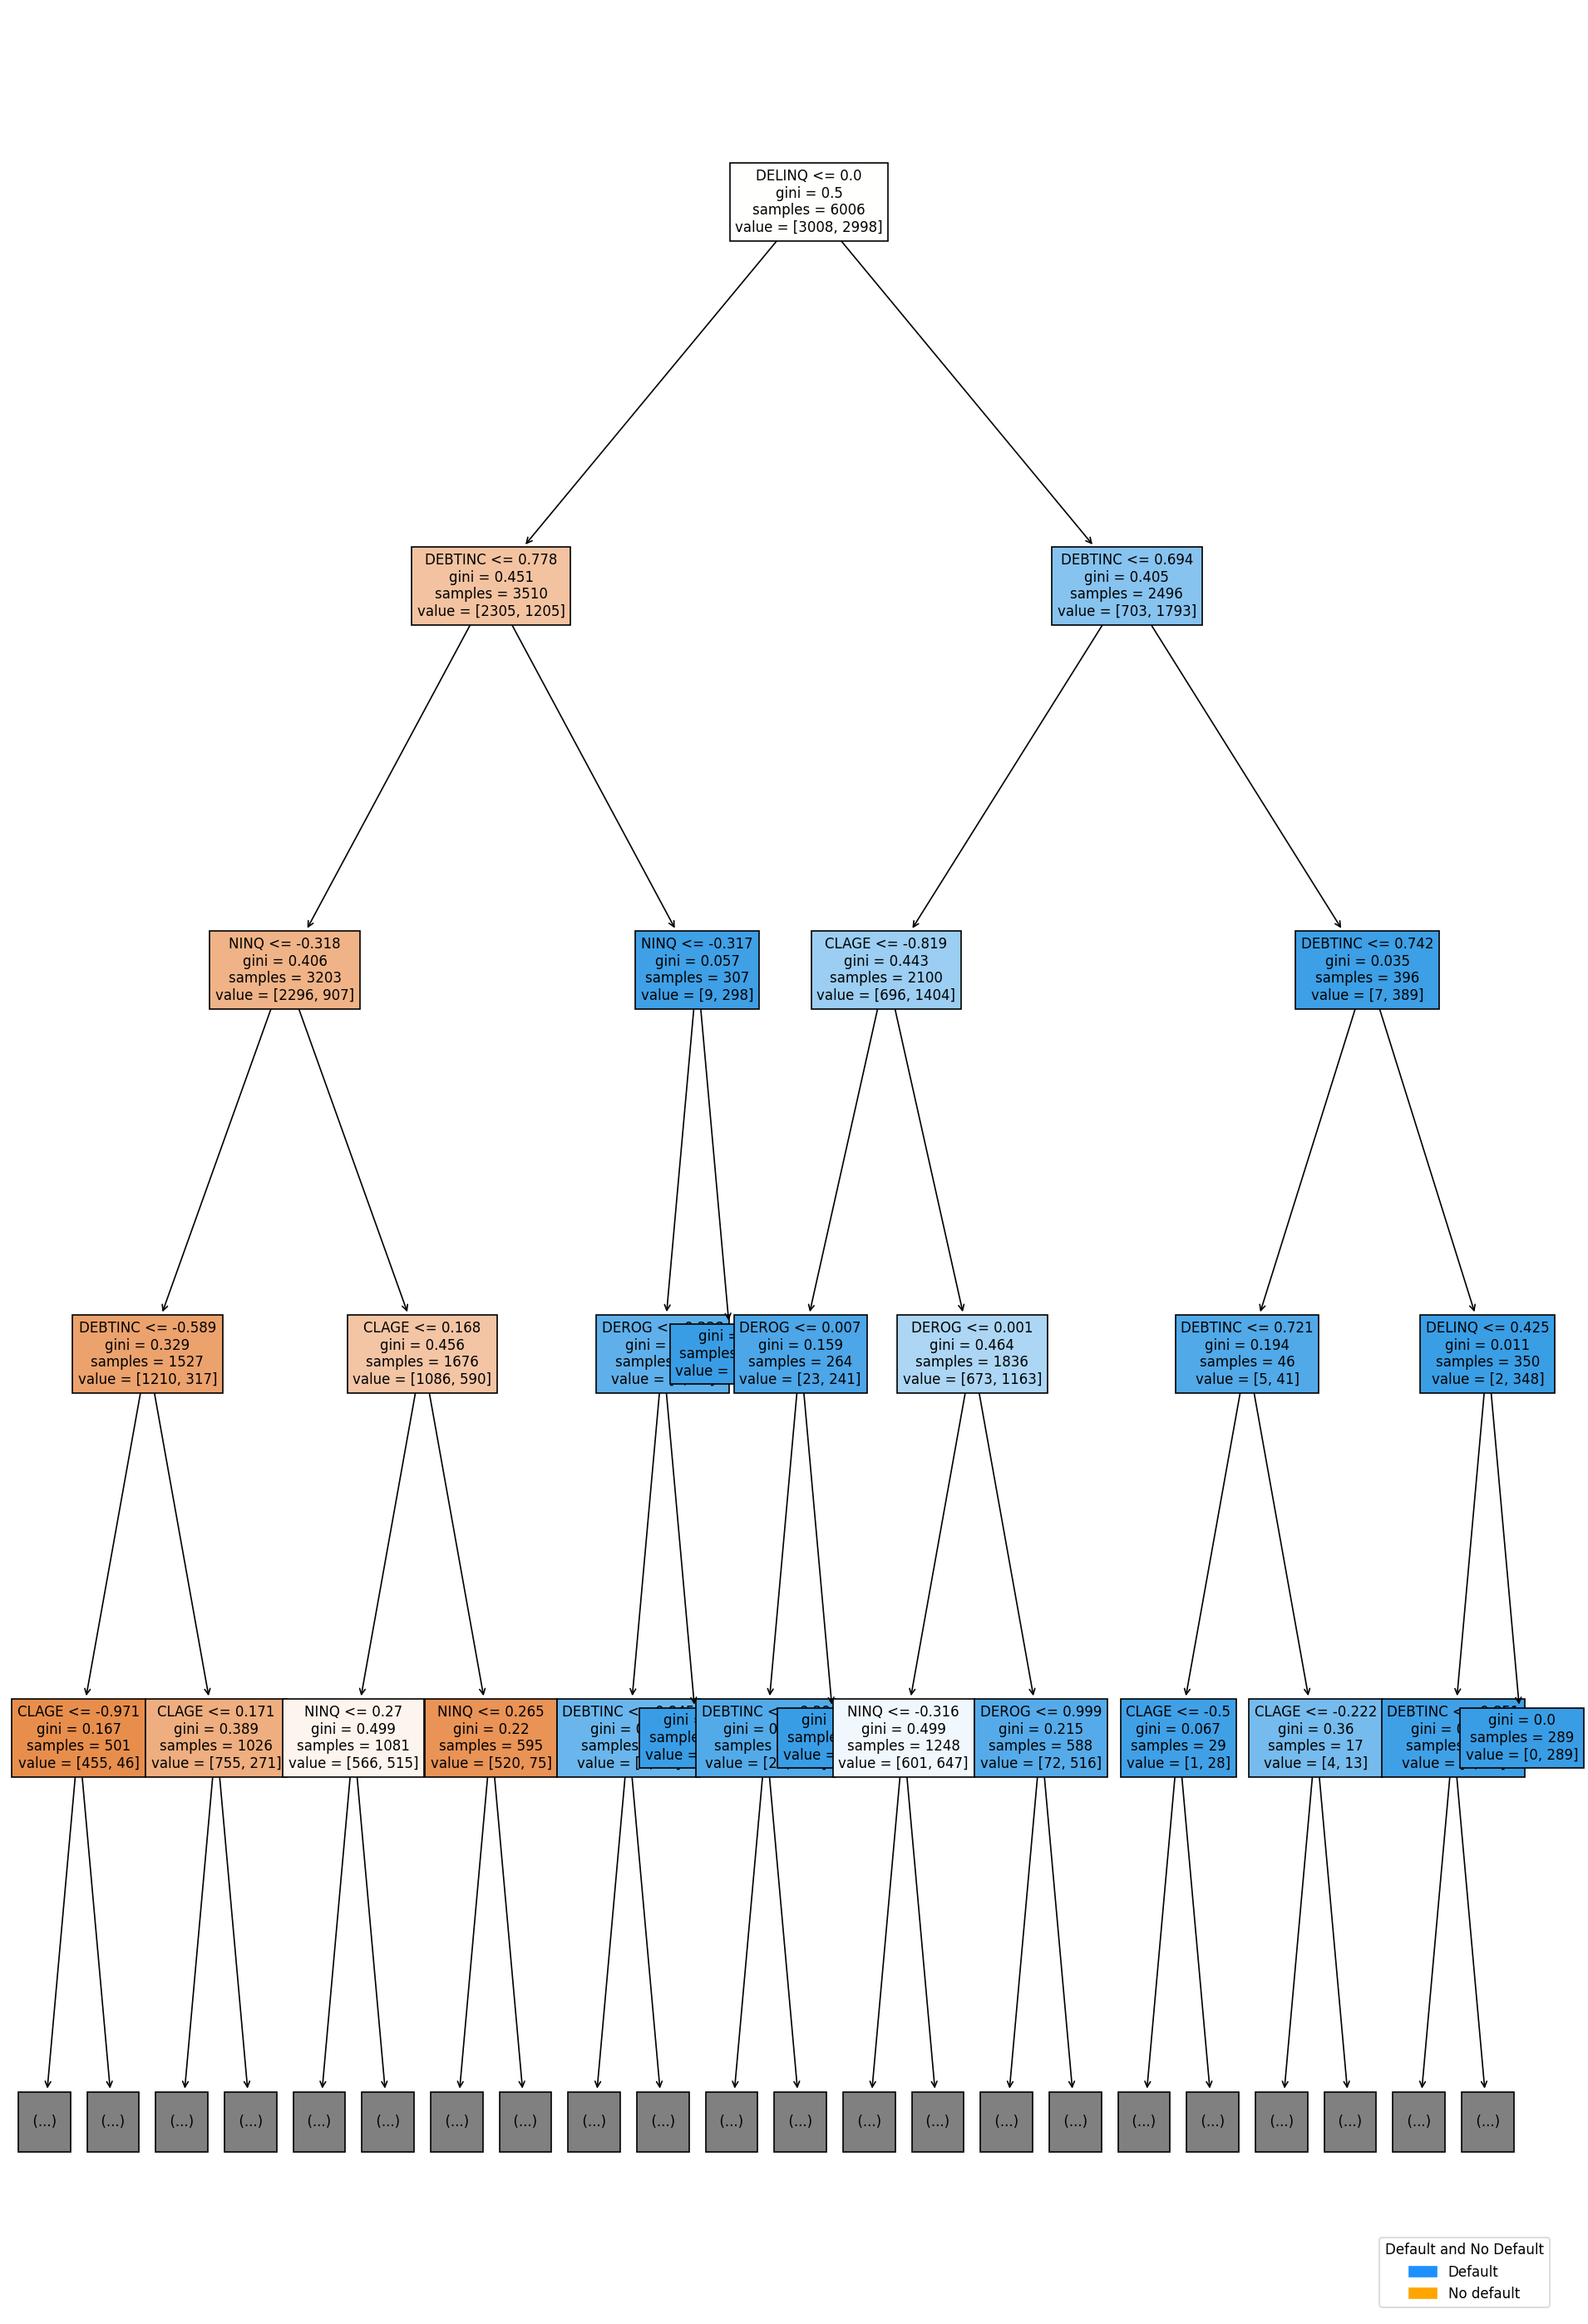

In [192]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(20, 30))
tree.plot_tree(clf, feature_names=feature_names, filled=True, fontsize=10, max_depth= 4)

# Example of adding a legend
class_names = ['Default', 'No default']  # Replace with class names
colors = ['dodgerblue', 'orange']  # Replace with corresponding fill colors

# Create legend handles and labels
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
legend_labels = class_names

# Add legend to the figure
plt.legend(legend_handles, legend_labels, loc='lower right', title='Default and No Default')

plt.show()

# Random Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state= 0)
# Fitting the model
rf.fit(x_train,y_train)

# Predicting the model
pred_rf= rf.predict(x_test)

In [175]:
from sklearn.metrics import classification_report
print("The accuracy of Random Forest model is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test,pred_rf, target_names= ['Non Default','Default'] ))

The accuracy of Random Forest model is: 0.9487179487179487
              precision    recall  f1-score   support

 Non Default       0.94      0.96      0.95      1282
     Default       0.96      0.94      0.95      1292

    accuracy                           0.95      2574
   macro avg       0.95      0.95      0.95      2574
weighted avg       0.95      0.95      0.95      2574



In [176]:
y_pred_proba_rf = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_rf)
auc = metrics.roc_auc_score(y_test, y_pred_proba_rf)
print('AUC score in Random Forest Model is :',auc)

AUC score in Random Forest Model is : 0.9846393623546799


# Important features with Random Forest Model 

In [177]:
rf_100 = RandomForestClassifier(n_estimators= 100, random_state= 0)

rf_100.fit(x_train, y_train)


RandomForestClassifier(random_state=0)

In [178]:
feature_scores = pd.Series(rf_100.feature_importances_, index = x_train.columns).sort_values(ascending = True)
feature_scores


DEROG      0.121391
NINQ       0.185173
CLAGE      0.219848
DELINQ     0.223541
DEBTINC    0.250047
dtype: float64

Text(0.5, 1.0, 'Feature Importances')

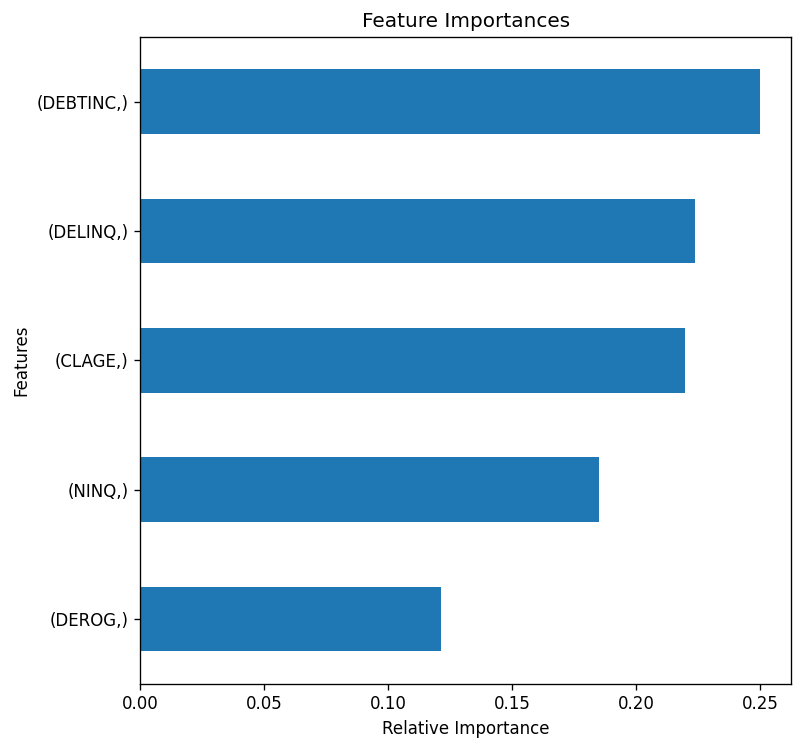

In [179]:
feature_scores.plot(kind = 'barh')
plt.ylabel('Features')
plt.xlabel('Relative Importance')
plt.title('Feature Importances')